Importing the Dependencies

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np


Data Collection and Processing

In [22]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [23]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [25]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [28]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [29]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [30]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [31]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [32]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training & Evaluation

1. Linear Regression

In [34]:
# loading the linear regression model
lin_reg_model = LinearRegression()
# training the model
lin_reg_model.fit(X_train,Y_train)
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("Linear Regression R2 score (Train) : ", error_score)

# RMSE Error
rmse = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
print("RMSE (Train): ", rmse)

# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("Linear Regression R2 score (Test) : ", error_score)


# RMSE Error
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print("RMSE (Test): ", rmse)

Linear Regression R2 score (Train) :  0.8799451660493711
RMSE (Train):  1.8052785999144527
Linear Regression R2 score (Test) :  0.8365766715027051
RMSE (Test):  1.4663321311979867


Visualize the actual prices and Predicted prices

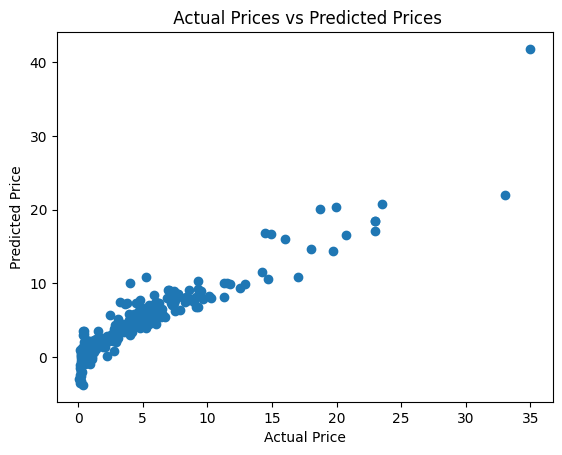

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

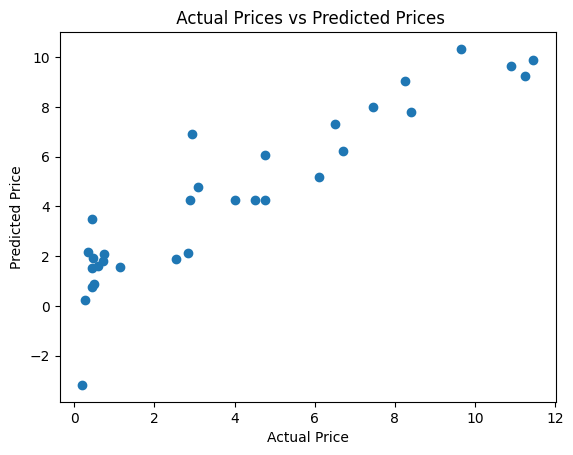

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Decision Tree

In [44]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Assuming X_train, Y_train, X_test, and Y_test are already defined and contain your training and testing data

# Decision Tree Model
# Loading the decision tree model
decision_tree_model = DecisionTreeRegressor()

# Training the model
decision_tree_model.fit(X_train, Y_train)

# Prediction on training data
training_data_prediction_dt = decision_tree_model.predict(X_train)

# R squared Error for Decision Tree on training data
r2_score_dt_train = metrics.r2_score(Y_train, training_data_prediction_dt)
print("Decision Tree R2 score (Train) : ", r2_score_dt_train)

# RMSE Error
rmse = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction_dt))
print("RMSE (Train): ", rmse)

# Prediction on test data for Decision Tree
test_data_prediction_dt = decision_tree_model.predict(X_test)

# R squared Error for Decision Tree on test data
r2_score_dt_test = metrics.r2_score(Y_test, test_data_prediction_dt)
print("Decision Tree R2 score (Test) : ", r2_score_dt_test)

# RMSE Error
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction_dt))
print("RMSE (Test): ", rmse)

Decision Tree R2 score (Train) :  1.0
RMSE (Train):  5.8513891142945016e-18
Decision Tree R2 score (Test) :  0.9254341835715472
RMSE (Test):  0.9904788675669837


Visualize the actual prices and Predicted prices

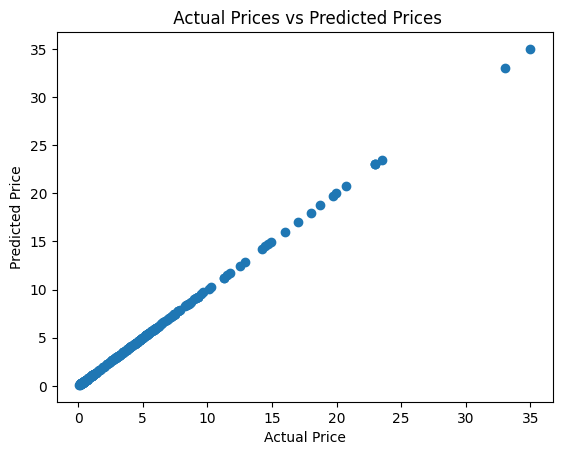

In [38]:
plt.scatter(Y_train, training_data_prediction_dt)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

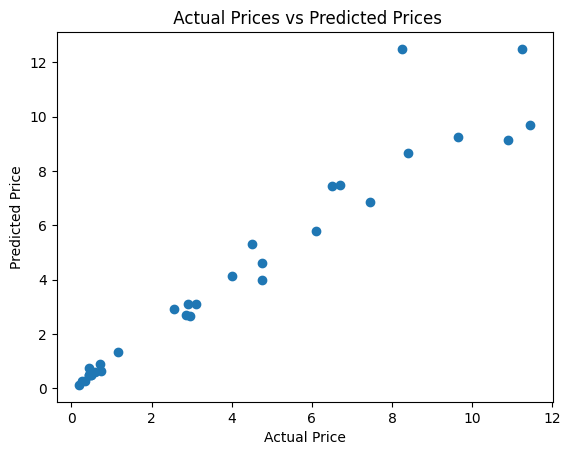

In [39]:
plt.scatter(Y_test, test_data_prediction_dt)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

3. Random Forest Regressor

In [45]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Assuming X_train, Y_train, X_test, and Y_test are already defined and contain your training and testing data

# Random Forest Model
# Loading the random forest model
random_forest_model = RandomForestRegressor()

# Training the model
random_forest_model.fit(X_train, Y_train)

# Prediction on training data
training_data_prediction_rf = random_forest_model.predict(X_train)

# R squared Error for Random Forest on training data
r2_score_rf_train = metrics.r2_score(Y_train, training_data_prediction_rf)
print("Random Forest R2 score (Train) : ", r2_score_rf_train)

# RMSE Error
rmse = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction_rf))
print("RMSE (Train): ", rmse)

# Prediction on test data for Random Forest
test_data_prediction_rf = random_forest_model.predict(X_test)

# R squared Error for Random Forest on test data
r2_score_rf_test = metrics.r2_score(Y_test, test_data_prediction_rf)
print("Random Forest R2 score (Test) : ", r2_score_rf_test)

# RMSE Error
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction_rf))
print("RMSE (Test): ", rmse)

Random Forest R2 score (Train) :  0.9863795386499379
RMSE (Train):  0.6080654355321379
Random Forest R2 score (Test) :  0.9774634342570943
RMSE (Test):  0.5445267175529893


Visualizing the actual prices and predicted prices

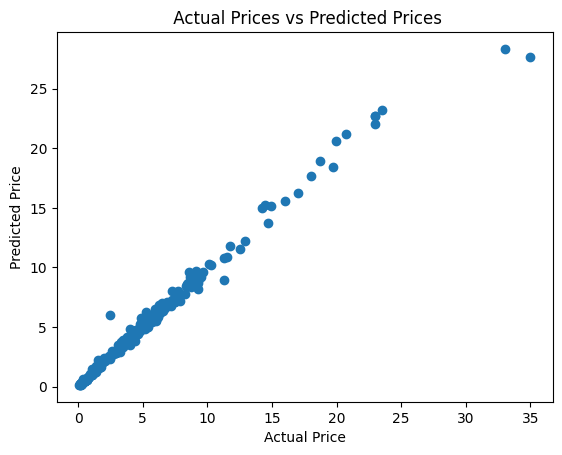

In [41]:
plt.scatter(Y_train, training_data_prediction_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

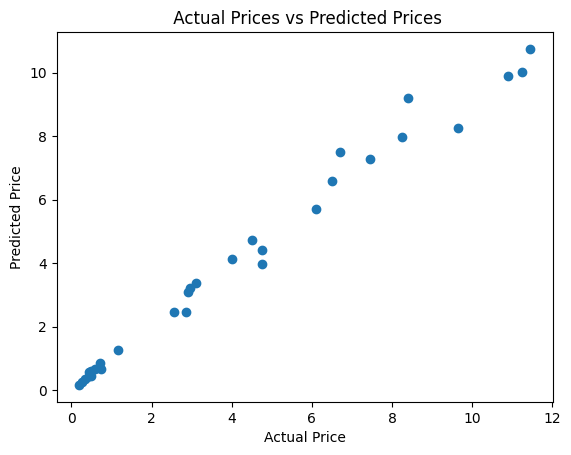

In [42]:
plt.scatter(Y_test, test_data_prediction_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()